In [ ]:
pip install scikit-tda;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ripser: filename=ripser-0.6.4-cp39-cp39-linux_x86_64.whl size=686678 sha256=a116705cf83cb654b498400fd0d73e487490ea23e58d2309ed639d7abc5c00e7
  Stored in directory: /root/.cache/pip/wheels/84/a5/30/d8e516decf393f419edbc9f4311addcb3f164b87c671ea6d21
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18117 sha256=db589281a6530eb3431dbf22d11b47cada541e39f78af2c14b770db9b759a210
  Stored in directory: /root/.cache/pip/wheels/57/

In [ ]:
!pip install gudhi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 30.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import gudhi as gd
import matplotlib.pyplot as plt
import tadasets
import ripser
import persim
import networkx as nx
import itertools
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.spatial import Delaunay
from gudhi import AlphaComplex
from mpl_toolkits import mplot3d

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Visualización de complejos alpha

In [ ]:
%matplotlib inline 
def draw_2d_simplicial_complex(simplices, pos=None, return_pos=False, ax = None):
    #List of 0-simplices
    nodes =list(set(itertools.chain(*simplices)))
    
    #List of 1-simplices
    edges = list(set(itertools.chain(*[[tuple(sorted((i, j))) for i, j in itertools.combinations(simplex, 2)] for simplex in simplices])))

    #List of 2-simplices
    triangles = list(set(itertools.chain(*[[tuple(sorted((i, j, k))) for i, j, k in itertools.combinations(simplex, 3)] for simplex in simplices])))
    
    if ax is None: ax = plt.gca()
    ax.set_xlim([-1.1, 1.1])      
    ax.set_ylim([-1.1, 1.1])
    ax.get_xaxis().set_ticks([])  
    ax.get_yaxis().set_ticks([])
    ax.axis('off')
       
    if pos is None:
        # Creating a networkx Graph from the edgelist
        G = nx.Graph()
        G.add_edges_from(edges)
        # Creating a dictionary for the position of the nodes
        pos = nx.spring_layout(G)
        
    # Drawing the edges
    for i, j in edges:
        (x0, y0) = pos[i]
        (x1, y1) = pos[j]
        line = plt.Line2D([ x0, x1 ], [y0, y1 ],color = 'black', zorder = 1, lw=0.7)
        ax.add_line(line);
    
    # Filling in the triangles
    for i, j, k in triangles:
        (x0, y0) = pos[i]
        (x1, y1) = pos[j]
        (x2, y2) = pos[k]
        tri = plt.Polygon([ [ x0, y0 ], [ x1, y1 ], [ x2, y2 ] ],
                          edgecolor = 'black', facecolor = plt.cm.Blues(0.6),
                          zorder = 2, alpha=0.4, lw=0.5)
        ax.add_patch(tri);

    # Drawing the nodes 
    for i in nodes:
        (x, y) = pos[i]
        circ = plt.Circle([ x, y ], radius = 0.02, zorder = 3, lw=0.5,
                          edgecolor = 'Black', facecolor = u'#ff7f0e')
        ax.add_patch(circ);

    if return_pos: return pos

# Nube 30 puntos aleatorios

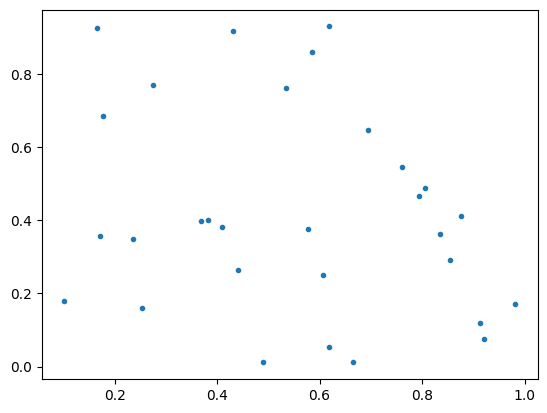

In [ ]:
puntos = pd.DataFrame(np.random.uniform(size=(30, 2)), columns=list('XY'))
plt.scatter(puntos.X, puntos.Y,marker=".")
plt.show()

## 2 a 3 complejos alpha (dibujados)

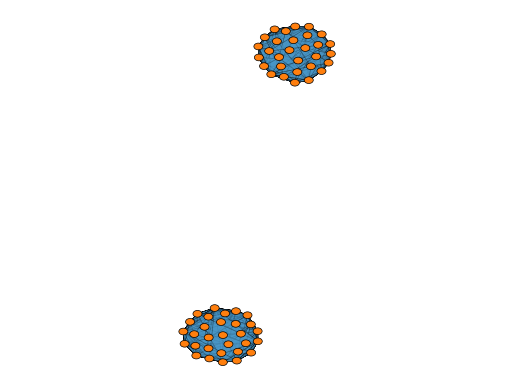

In [ ]:
draw_2d_simplicial_complex([puntos.X,puntos.Y])
plt.show()

In [ ]:
# estructura en la lista de los puntos debe ser lista de par de puntos en puntos
lista_puntos_1 = [[puntos.X[i], puntos.Y[i]] for i in range(len(puntos.X)) ]

# Creación de la función para pasar la lista de puntos
ac = AlphaComplex(points= lista_puntos_1)
st = ac.create_simplex_tree()

print('El complejo alpha tiene una dimensión de ', st.dimension(), ' - ',
  st.num_simplices(), ' simplices - ', st.num_vertices(), ' vértices.')

fmt = '%s -> %.2f'
for filtered_value in st.get_filtration():
    print(fmt % tuple(filtered_value))

El complejo alpha tiene una dimensión de  2  -  159  simplices -  30  vértices.
[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[7] -> 0.00
[8] -> 0.00
[9] -> 0.00
[10] -> 0.00
[11] -> 0.00
[12] -> 0.00
[13] -> 0.00
[14] -> 0.00
[15] -> 0.00
[16] -> 0.00
[17] -> 0.00
[18] -> 0.00
[19] -> 0.00
[20] -> 0.00
[21] -> 0.00
[22] -> 0.00
[23] -> 0.00
[24] -> 0.00
[25] -> 0.00
[26] -> 0.00
[27] -> 0.00
[28] -> 0.00
[29] -> 0.00
[5, 8] -> 0.00
[10, 26] -> 0.00
[2, 5] -> 0.00
[1, 27] -> 0.00
[19, 21] -> 0.00
[3, 29] -> 0.00
[7, 25] -> 0.00
[2, 8] -> 0.00
[2, 5, 8] -> 0.00
[13, 29] -> 0.00
[10, 23] -> 0.00
[0, 11] -> 0.00
[1, 15] -> 0.00
[23, 26] -> 0.00
[10, 23, 26] -> 0.00
[3, 26] -> 0.00
[3, 10] -> 0.00
[3, 10, 26] -> 0.00
[11, 12] -> 0.00
[26, 29] -> 0.00
[3, 26, 29] -> 0.00
[20, 23] -> 0.00
[2, 22] -> 0.00
[17, 18] -> 0.00
[15, 27] -> 0.00
[1, 15, 27] -> 0.00
[14, 24] -> 0.00
[6, 21] -> 0.00
[7, 8] -> 0.01
[3, 13] -> 0.01
[3, 13, 29] -> 0.01
[16, 28] -> 0.

## Diagramas de Voronoi

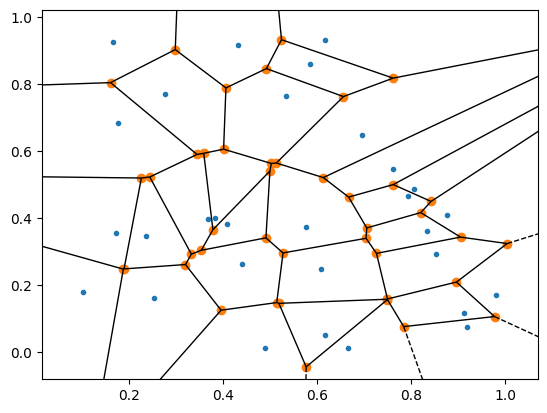

In [ ]:
voronoi_plot_2d(Voronoi(puntos));

## Complejo de Delaunay

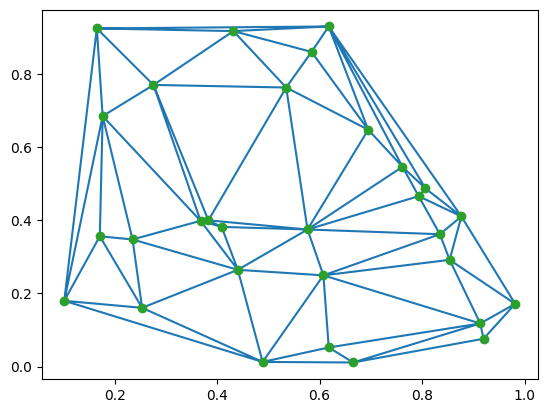

In [ ]:
tri = Delaunay(puntos)
plt.triplot(puntos.X, puntos.Y, tri.simplices)
plt.plot(puntos.X, puntos.Y, 'o')
plt.show()

## Diagramas de persistencia asociados a los complejos alpha

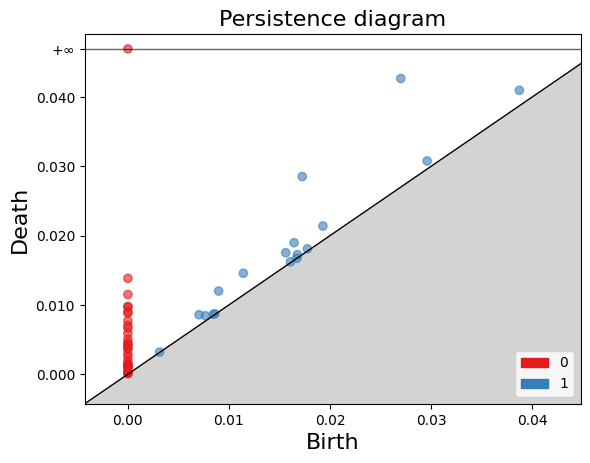

In [ ]:
dgm = st.persistence()
gd.plot_persistence_diagram(dgm, legend = True)
plt.show()

# Circunferencia 100 o 1000 puntos

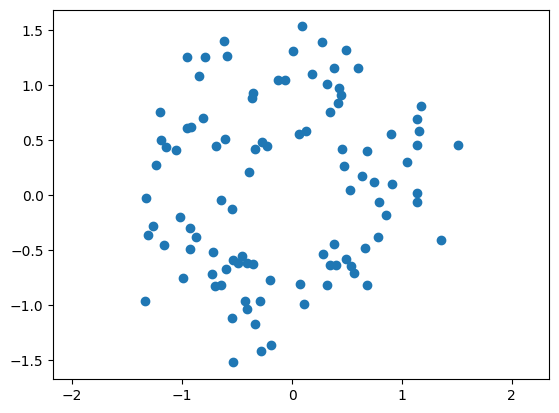

In [ ]:
datos_Circunferencia = tadasets.dsphere(d=1,n=100, r=1, noise=0.3) #esta es una esfera de dimensión d=1 en el plano, radio 1 y en la cual se tomaron "aleatoriamente" 100 puntos.
datos_Circunferencia 
plt.scatter(datos_Circunferencia[:, 0], datos_Circunferencia[:, 1])
plt.axis('equal')
plt.show()

## 2 a 3 complejos alpha (dibujados)

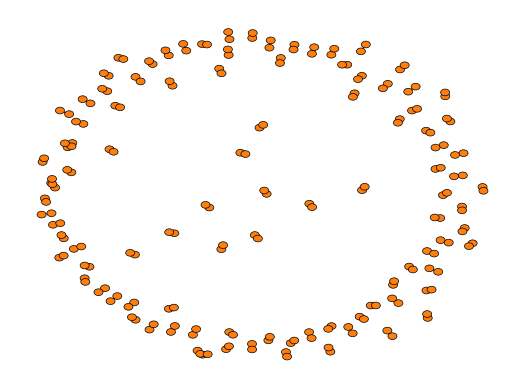

In [ ]:
draw_2d_simplicial_complex(datos_Circunferencia)
plt.show()

In [ ]:
ac_circun = AlphaComplex(points=datos_Circunferencia)
st_circun = ac_circun.create_simplex_tree()

print('El complejo alpha tiene una dimensión de ', st_circun.dimension(), ' - ',
  st_circun.num_simplices(), ' simplices - ', st_circun.num_vertices(), ' vértices.')

El complejo alpha tiene una dimensión de  2  -  567  simplices -  100  vértices.


In [ ]:
fmt = '%s -> %.2f'
for filtered_value in st_circun.get_filtration():
    print(fmt % tuple(filtered_value))

[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[7] -> 0.00
[8] -> 0.00
[9] -> 0.00
[10] -> 0.00
[11] -> 0.00
[12] -> 0.00
[13] -> 0.00
[14] -> 0.00
[15] -> 0.00
[16] -> 0.00
[17] -> 0.00
[18] -> 0.00
[19] -> 0.00
[20] -> 0.00
[21] -> 0.00
[22] -> 0.00
[23] -> 0.00
[24] -> 0.00
[25] -> 0.00
[26] -> 0.00
[27] -> 0.00
[28] -> 0.00
[29] -> 0.00
[30] -> 0.00
[31] -> 0.00
[32] -> 0.00
[33] -> 0.00
[34] -> 0.00
[35] -> 0.00
[36] -> 0.00
[37] -> 0.00
[38] -> 0.00
[39] -> 0.00
[40] -> 0.00
[41] -> 0.00
[42] -> 0.00
[43] -> 0.00
[44] -> 0.00
[45] -> 0.00
[46] -> 0.00
[47] -> 0.00
[48] -> 0.00
[49] -> 0.00
[50] -> 0.00
[51] -> 0.00
[52] -> 0.00
[53] -> 0.00
[54] -> 0.00
[55] -> 0.00
[56] -> 0.00
[57] -> 0.00
[58] -> 0.00
[59] -> 0.00
[60] -> 0.00
[61] -> 0.00
[62] -> 0.00
[63] -> 0.00
[64] -> 0.00
[65] -> 0.00
[66] -> 0.00
[67] -> 0.00
[68] -> 0.00
[69] -> 0.00
[70] -> 0.00
[71] -> 0.00
[72] -> 0.00
[73] -> 0.00
[74] -> 0.00
[75] -> 0.00
[76] -> 0.00
[77] -> 0

## Diagramas de Voronoi

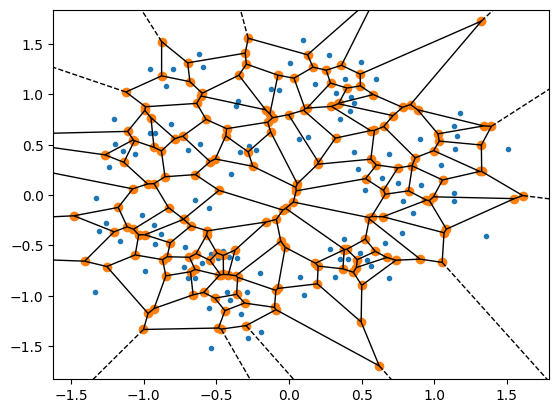

In [ ]:
voronoi_plot_2d(Voronoi(datos_Circunferencia));

## Complejo de Delaunay

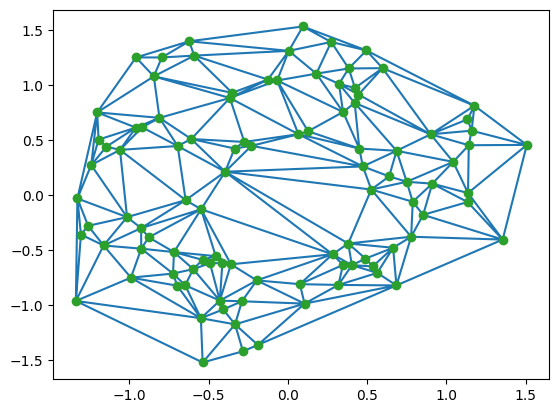

In [ ]:
tri = Delaunay(datos_Circunferencia)
plt.triplot(datos_Circunferencia[:,0], datos_Circunferencia[:,1], tri.simplices)
plt.plot(datos_Circunferencia[:,0], datos_Circunferencia[:,1], 'o')
plt.show()

## Diagramas de persistencia asociados a los complejos alpha

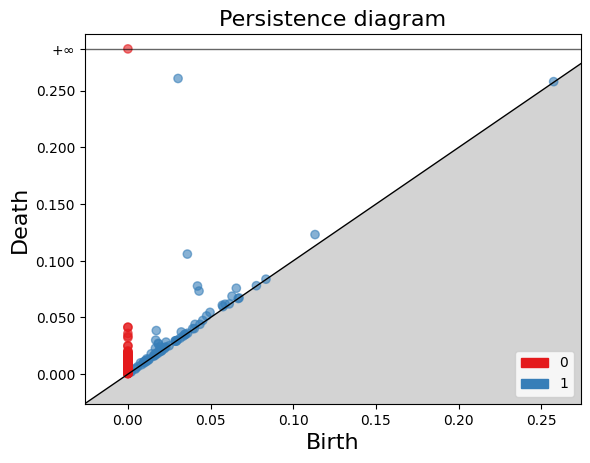

In [ ]:
dgm_circun = st_circun.persistence()
gd.plot_persistence_diagram(dgm_circun, legend = True)
plt.show()

# Calificaciones de alumnes

In [ ]:
calif=pd.read_csv('/content/gdrive/Shareddrives/Topología/CalifAlea.csv')
calif

,Alumno,Examen
0,Alumno 1,97.392215
1,Alumno 2,94.346812
2,Alumno 3,63.079803
3,Alumno 4,93.938068
4,Alumno 5,66.619685
...,...,...
1995,Alumno 1996,96.076909
1996,Alumno 1997,63.301853
1997,Alumno 1998,25.644937
1998,Alumno 1999,62.925204


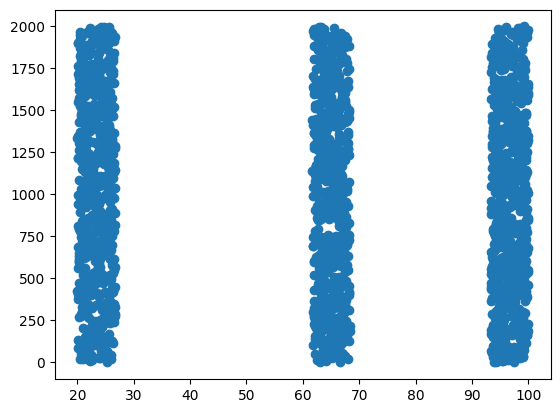

In [ ]:
y=np.zeros(calif.shape[0])
calif['Y'] = calif.index
Datos=calif[['Examen', 'Y']]
plt.scatter(Datos.Examen, Datos.Y)

plt.show()

In [ ]:
#creación de la muestra y su estructura
data100= Datos[0:100:]
data100 = np.array([[data100.Examen[i], data100.Y[i]] for i in range(len(data100))])


## 2 a 3 complejos alpha (dibujados)

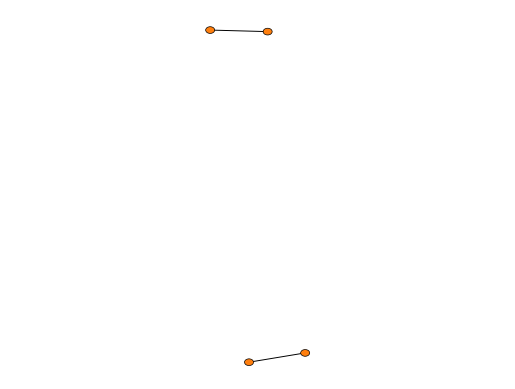

In [ ]:
draw_2d_simplicial_complex([data100[0],data100[1]])
plt.show()

In [ ]:
ac_calif = AlphaComplex(points= data100)
st_calif = ac_calif.create_simplex_tree()

print('El complejo alpha tiene una dimensión de ', st_calif.dimension(), ' - ',
  st_calif.num_simplices(), ' simplices - ', st_calif.num_vertices(), ' vértices.')

El complejo alpha tiene una dimensión de  2  -  571  simplices -  100  vértices.


In [ ]:
fmt = '%s -> %.2f'
for filtered_value in st_calif.get_filtration():
    print(fmt % tuple(filtered_value))

[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[7] -> 0.00
[8] -> 0.00
[9] -> 0.00
[10] -> 0.00
[11] -> 0.00
[12] -> 0.00
[13] -> 0.00
[14] -> 0.00
[15] -> 0.00
[16] -> 0.00
[17] -> 0.00
[18] -> 0.00
[19] -> 0.00
[20] -> 0.00
[21] -> 0.00
[22] -> 0.00
[23] -> 0.00
[24] -> 0.00
[25] -> 0.00
[26] -> 0.00
[27] -> 0.00
[28] -> 0.00
[29] -> 0.00
[30] -> 0.00
[31] -> 0.00
[32] -> 0.00
[33] -> 0.00
[34] -> 0.00
[35] -> 0.00
[36] -> 0.00
[37] -> 0.00
[38] -> 0.00
[39] -> 0.00
[40] -> 0.00
[41] -> 0.00
[42] -> 0.00
[43] -> 0.00
[44] -> 0.00
[45] -> 0.00
[46] -> 0.00
[47] -> 0.00
[48] -> 0.00
[49] -> 0.00
[50] -> 0.00
[51] -> 0.00
[52] -> 0.00
[53] -> 0.00
[54] -> 0.00
[55] -> 0.00
[56] -> 0.00
[57] -> 0.00
[58] -> 0.00
[59] -> 0.00
[60] -> 0.00
[61] -> 0.00
[62] -> 0.00
[63] -> 0.00
[64] -> 0.00
[65] -> 0.00
[66] -> 0.00
[67] -> 0.00
[68] -> 0.00
[69] -> 0.00
[70] -> 0.00
[71] -> 0.00
[72] -> 0.00
[73] -> 0.00
[74] -> 0.00
[75] -> 0.00
[76] -> 0.00
[77] -> 0

## Diagramas de Voronoi

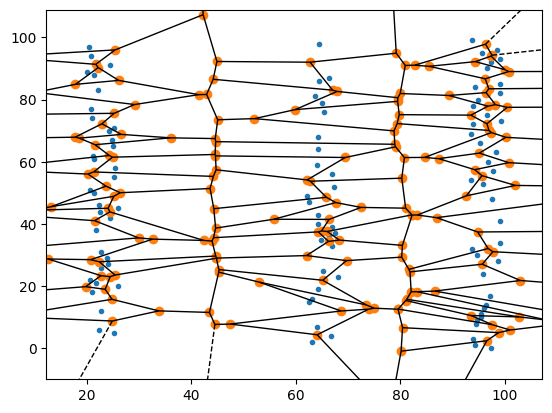

In [ ]:
voronoi_plot_2d(Voronoi(data100));

## Complejo de Delaunay

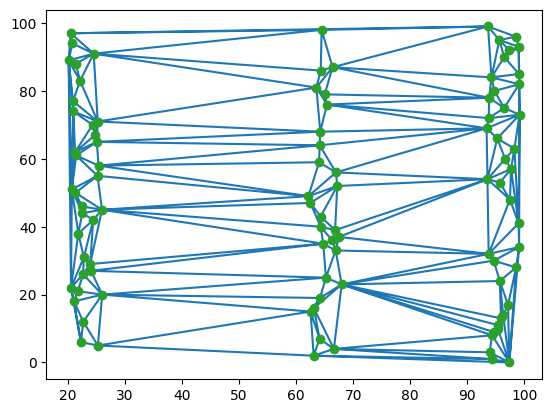

In [ ]:
tri = Delaunay(data100)
plt.triplot(data100[:,0], data100[:,1], tri.simplices)
plt.plot(data100[:,0], data100[:,1], 'o')
plt.show()

## Diagramas de persistencia asociados a los complejos alpha

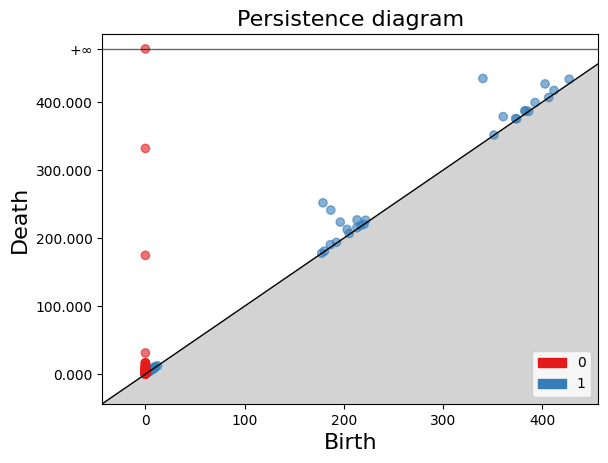

In [ ]:
dgm_calif = st_calif.persistence()
gd.plot_persistence_diagram(dgm_calif, legend = True)
plt.show()

# Esfera 100 o 1000 puntos

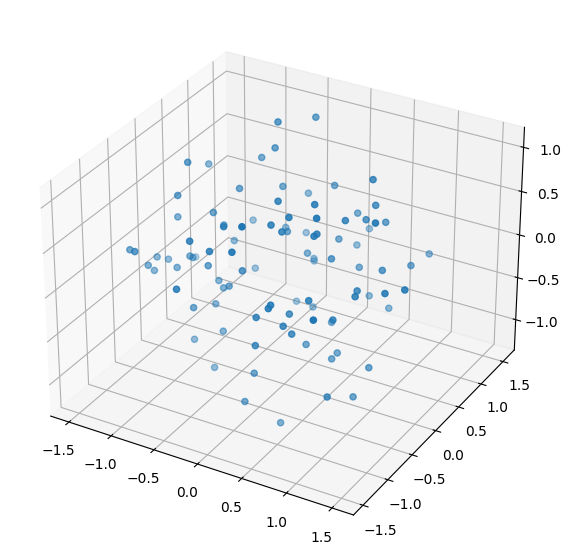

In [ ]:
datos_Esfera = tadasets.dsphere(d=2,n=100, r=1, noise=0.3) #esta es una esfera de dimensión d=1 en el plano, radio 1 y en la cual se tomaron "aleatoriamente" 1000 puntos.

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(datos_Esfera[:, 0], datos_Esfera[:, 1], datos_Esfera [:,2])
ax.axis('equal')
plt.show()

## 2 a 3 complejos alpha (dibujados)

In [ ]:
# este creo que no funciona para 3d
#draw_2d_simplicial_complex(datos_Esfera)
#plt.show()

In [ ]:
ac_esf = AlphaComplex(points=datos_Esfera)
st_esf = ac_esf.create_simplex_tree()

print('El complejo alpha tiene una dimensión de ', st_esf.dimension(), ' - ',
  st_esf.num_simplices(), ' simplices - ', st_esf.num_vertices(), ' vértices.')

El complejo alpha tiene una dimensión de  3  -  2303  simplices -  100  vértices.


In [ ]:
fmt = '%s -> %.2f'
for filtered_value in st_esf.get_filtration():
    print(fmt % tuple(filtered_value))

[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[7] -> 0.00
[8] -> 0.00
[9] -> 0.00
[10] -> 0.00
[11] -> 0.00
[12] -> 0.00
[13] -> 0.00
[14] -> 0.00
[15] -> 0.00
[16] -> 0.00
[17] -> 0.00
[18] -> 0.00
[19] -> 0.00
[20] -> 0.00
[21] -> 0.00
[22] -> 0.00
[23] -> 0.00
[24] -> 0.00
[25] -> 0.00
[26] -> 0.00
[27] -> 0.00
[28] -> 0.00
[29] -> 0.00
[30] -> 0.00
[31] -> 0.00
[32] -> 0.00
[33] -> 0.00
[34] -> 0.00
[35] -> 0.00
[36] -> 0.00
[37] -> 0.00
[38] -> 0.00
[39] -> 0.00
[40] -> 0.00
[41] -> 0.00
[42] -> 0.00
[43] -> 0.00
[44] -> 0.00
[45] -> 0.00
[46] -> 0.00
[47] -> 0.00
[48] -> 0.00
[49] -> 0.00
[50] -> 0.00
[51] -> 0.00
[52] -> 0.00
[53] -> 0.00
[54] -> 0.00
[55] -> 0.00
[56] -> 0.00
[57] -> 0.00
[58] -> 0.00
[59] -> 0.00
[60] -> 0.00
[61] -> 0.00
[62] -> 0.00
[63] -> 0.00
[64] -> 0.00
[65] -> 0.00
[66] -> 0.00
[67] -> 0.00
[68] -> 0.00
[69] -> 0.00
[70] -> 0.00
[71] -> 0.00
[72] -> 0.00
[73] -> 0.00
[74] -> 0.00
[75] -> 0.00
[76] -> 0.00
[77] -> 0

## Diagramas de Voronoi

<function matplotlib.pyplot.show(close=None, block=None)>

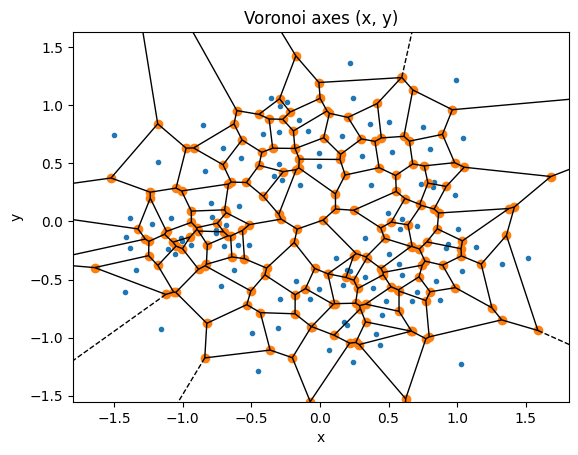

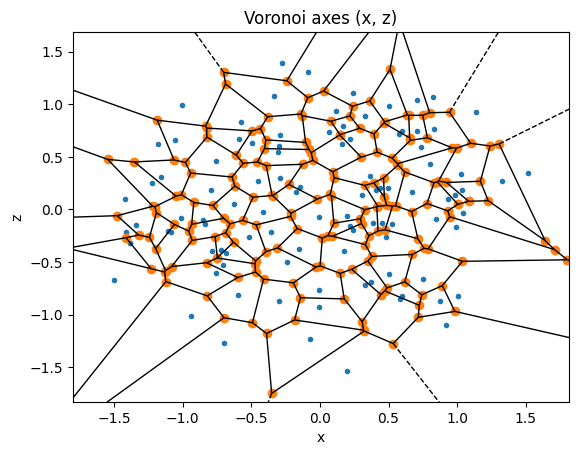

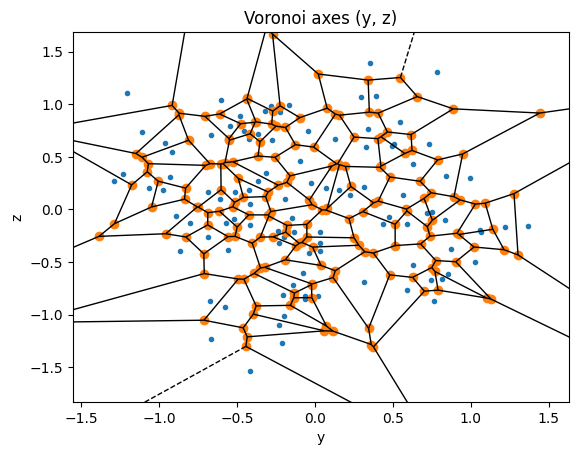

In [ ]:
voronoi_plot_2d(Voronoi(datos_Esfera[:,:2]));
plt.title("Voronoi axes (x, y)")
plt.xlabel("x")
plt.ylabel("y")

voronoi_plot_2d(Voronoi(datos_Esfera[:,[0,2]]));
plt.title("Voronoi axes (x, z)")
plt.xlabel("x")
plt.ylabel("z")

voronoi_plot_2d(Voronoi(datos_Esfera[:,1:]));
plt.title("Voronoi axes (y, z)")
plt.xlabel("y")
plt.ylabel("z")
plt.show

## Complejo de Delaunay

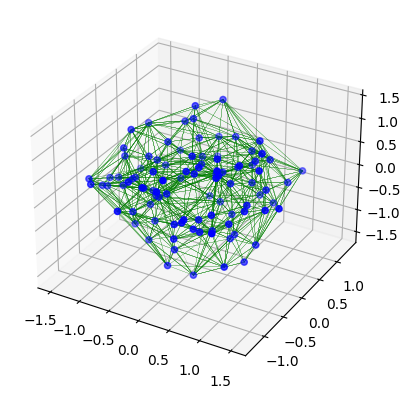

In [ ]:
def plot_tri_simple(ax, points, tri):
    for tr in tri.simplices:
        pts = points[tr, :]
        ax.plot3D(pts[[0,1],0], pts[[0,1],1], pts[[0,1],2], color='g', lw='0.1')
        ax.plot3D(pts[[0,2],0], pts[[0,2],1], pts[[0,2],2], color='g', lw='0.1')
        ax.plot3D(pts[[0,3],0], pts[[0,3],1], pts[[0,3],2], color='g', lw='0.1')
        ax.plot3D(pts[[1,2],0], pts[[1,2],1], pts[[1,2],2], color='g', lw='0.1')
        ax.plot3D(pts[[1,3],0], pts[[1,3],1], pts[[1,3],2], color='g', lw='0.1')
        ax.plot3D(pts[[2,3],0], pts[[2,3],1], pts[[2,3],2], color='g', lw='0.1')

    ax.scatter(points[:,0], points[:,1], points[:,2], color='b')

tri = Delaunay(datos_Esfera)
plot_tri_simple(plt.axes(projection='3d'), datos_Esfera, tri)

## Diagramas de persistencia asociados a los complejos alpha

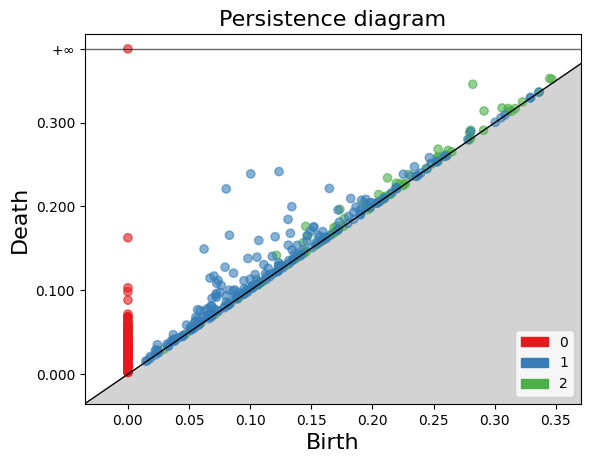

In [ ]:
dgm_esf = st_esf.persistence()
gd.plot_persistence_diagram(dgm_esf, legend = True)
plt.show()